In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/Program/trj/src/trj/
%ls

Mounted at /content/drive
/content/drive/MyDrive/Program/trj/src/trj
20230620T141123Z-001/  20230620T141306Z-001/  20230710T092002Z-001/  20231222_problem/


In [2]:
%cd /content/drive/MyDrive/Program/trj/src/trj/
%cd 20231222_problem/

/content/drive/MyDrive/Program/trj/src/trj
/content/drive/MyDrive/Program/trj/src/trj/20231222_problem


['trj_7.txt', 'trj_3.txt', 'trj_5.txt', 'trj (1).txt']
trj_7.txt
2023-12-08 02:19:25,2023-12-08 02:20:49
02,19,25,02,20,49
2023-12-08 02:21:05,2023-12-08 02:22:31
02,21,05,02,22,31
2023-12-08 02:22:47,2023-12-08 02:24:13
02,22,47,02,24,13
2023-12-08 02:24:29,2023-12-08 02:25:57
02,24,29,02,25,57
2023-12-08 02:26:13,2023-12-08 02:27:42
02,26,13,02,27,42
2023-12-08 02:27:58,2023-12-08 02:29:28
02,27,58,02,29,28
2023-12-08 02:29:44,2023-12-08 02:31:40
02,29,44,02,31,40


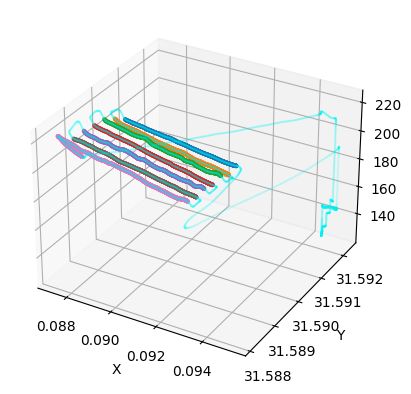

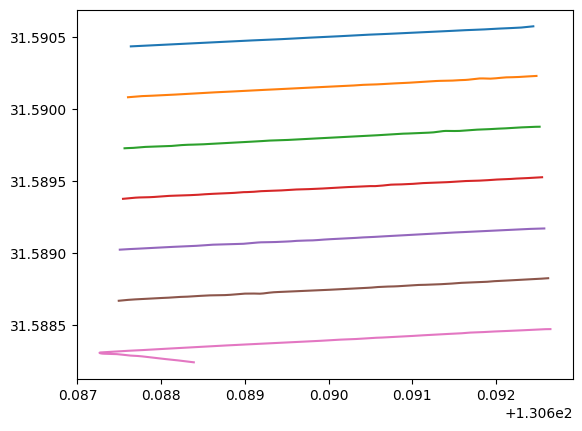

0:00:01.339784

trj_3.txt
2023-12-07 04:13:10,2023-12-07 04:14:10
04,13,10,04,14,10
2023-12-07 04:14:24,2023-12-07 04:15:46
04,14,24,04,15,46
2023-12-07 04:16:16,2023-12-07 04:17:40
04,16,16,04,17,40
2023-12-07 04:18:01,2023-12-07 04:19:47
04,18,01,04,19,47
2023-12-07 04:20:06,2023-12-07 04:21:57
04,20,06,04,21,57
2023-12-07 04:22:14,2023-12-07 04:24:13
04,22,14,04,24,13
2023-12-07 04:24:31,2023-12-07 04:26:29
04,24,31,04,26,29


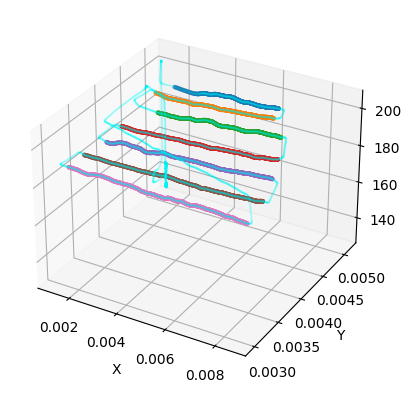

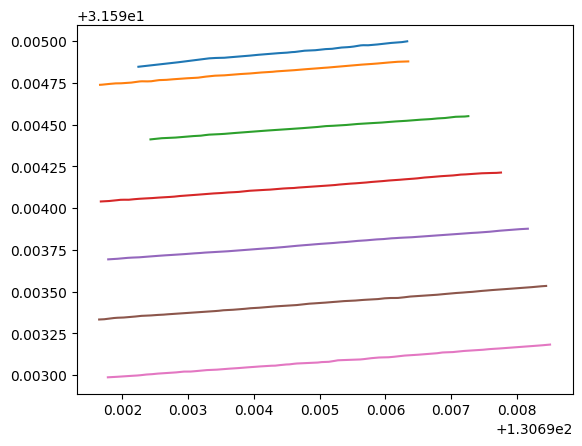

0:00:01.262379

trj_5.txt
2023-12-07 06:27:35,2023-12-07 06:29:28
06,27,35,06,29,28
2023-12-07 06:29:47,2023-12-07 06:31:40
06,29,47,06,31,40
2023-12-07 06:31:58,2023-12-07 06:33:54
06,31,58,06,33,54
2023-12-07 06:34:13,2023-12-07 06:36:10
06,34,13,06,36,10
2023-12-07 06:36:27,2023-12-07 06:38:27
06,36,27,06,38,27
2023-12-07 06:41:06,2023-12-07 06:41:35
06,41,06,06,41,35


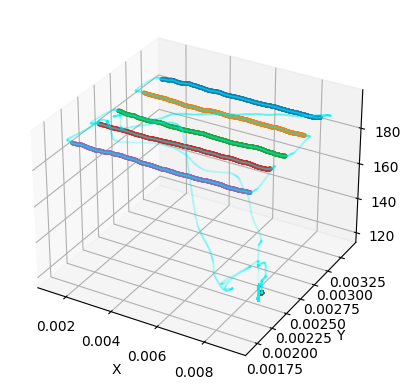

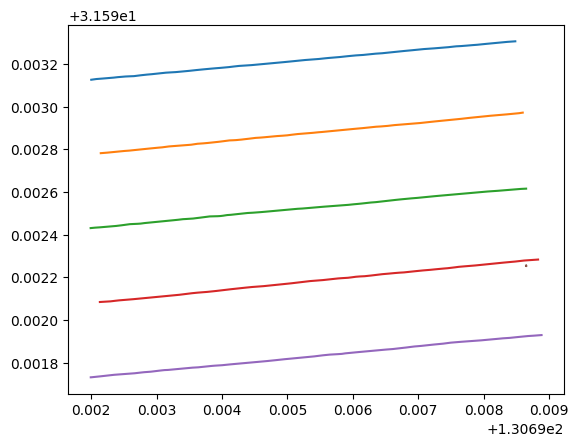

0:00:01.595640

trj (1).txt
2023-11-13 03:15:33,2023-11-13 03:15:47
03,15,33,03,15,47
2023-11-13 03:16:03,2023-11-13 03:16:38
03,16,03,03,16,38
2023-11-13 03:16:53,2023-11-13 03:17:28
03,16,53,03,17,28
2023-11-13 03:17:43,2023-11-13 03:18:17
03,17,43,03,18,17
2023-11-13 03:18:32,2023-11-13 03:19:04
03,18,32,03,19,04
2023-11-13 03:20:04,2023-11-13 03:20:25
03,20,04,03,20,25
2023-11-13 03:20:41,2023-11-13 03:21:01
03,20,41,03,21,01
2023-11-13 03:21:21,2023-11-13 03:21:53
03,21,21,03,21,53
2023-11-13 03:22:08,2023-11-13 03:22:44
03,22,08,03,22,44
2023-11-13 03:22:59,2023-11-13 03:23:34
03,22,59,03,23,34
2023-11-13 03:23:53,2023-11-13 03:24:20
03,23,53,03,24,20
2023-11-13 03:24:35,2023-11-13 03:24:53
03,24,35,03,24,53


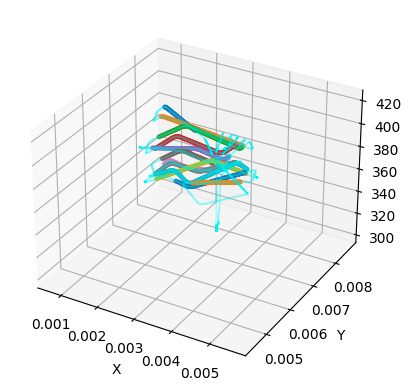

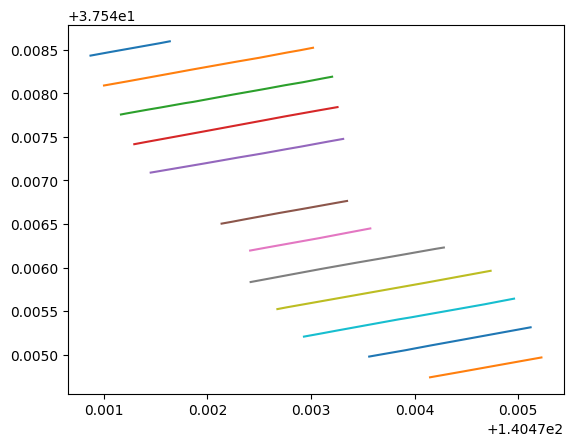

0:00:01.143215



In [20]:
import glob
import datetime

files = glob.glob('*.txt')
print(files)

for file in files:
  start_time = datetime.datetime.now()
  print(file)
  f_trj = open(file, 'r')
  data_trj_all = [s.rstrip() for s in f_trj.readlines()]
  f_trj.close()


  list_trj_all = []
  for str_data in data_trj_all:
    list_trj_all.append(str_data.split(','))


  list_trj_xyz = []
  list_trj_quaternion = []
  list_trj_unitime = []
  for l_data in list_trj_all:
    list_trj_unitime.append(float(l_data[0]))
    list_trj_xyz.append([float(l_data[2]), float(l_data[1]), float(l_data[3])])
    list_trj_quaternion.append([float(l_data[4]), float(l_data[5]), float(l_data[6]), float(l_data[7])])


  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib.pyplot as plt

  lit_x = [r[0] for r in list_trj_xyz]
  lit_y = [r[1] for r in list_trj_xyz]
  lit_z = [r[2] for r in list_trj_xyz]

  f_range_x = max(lit_x) - min(lit_x)
  f_range_y = max(lit_y) - min(lit_y)
  f_range_z = max(lit_z) - min(lit_z)
  f_ramge = (f_range_x, f_range_y, f_range_z)


  import math
  from enum import Enum

  class AnalysisMode(Enum):
    Sum = 1
    Skip = 2

  def DoubleDerivative(list_xyz, mode):
    def SubTangent(n_list_d):
      try:
        tan_a_xy = n_list_d[1][0] / n_list_d[0][0]
        tan_b_xy = n_list_d[1][1] / n_list_d[0][1]
      except ZeroDivisionError:
        return 0, True
      return (abs((tan_a_xy - tan_b_xy)/(1 + tan_a_xy * tan_b_xy))), False

    tan_fixed = (math.tan(math.radians(1)), math.tan(math.radians(5)), math.tan(math.radians(10)), math.tan(math.radians(20)), math.tan(math.radians(30)), math.tan(math.radians(40)))
    threshold_index = 0
    ret = 1

    sum_angular_variation_xy = 0.0

    if mode == AnalysisMode.Skip :
      i_skip = int((len(list_xyz) - 1) / 2 - 1)
      list_d = []
      for i_loop_coordinate_element in range(2):
        d1 = (list_xyz[i_skip + 1][i_loop_coordinate_element] - list_xyz[0][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        d2 = (list_xyz[len(list_xyz) - 1][i_loop_coordinate_element] - list_xyz[i_skip + 1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        list_d.append([d1, d2])
      tan_a_minus_b_xy, error = SubTangent(list_d)
      if error :
        return 0
      sum_angular_variation_xy = tan_a_minus_b_xy
      threshold_index = 1

    if mode == AnalysisMode.Sum :
      for i_loop_1 in range(len(list_xyz) - 1):
        if i_loop_1 == 0:
          pass
        else:
          list_d = []
          for i_loop_coordinate_element in range(2):
            d1 = (list_xyz[i_loop_1 - 1][i_loop_coordinate_element] - list_xyz[i_loop_1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
            d2 = (list_xyz[i_loop_1][i_loop_coordinate_element] - list_xyz[i_loop_1 + 1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
            list_d.append([d1, d2])
          tan_a_minus_b_xy, error = SubTangent(list_d)
          if error :
            return 0
          sum_angular_variation_xy += ((sum_angular_variation_xy + tan_a_minus_b_xy) / (1 - sum_angular_variation_xy * tan_a_minus_b_xy))
        threshold_index = 3
    if sum_angular_variation_xy < tan_fixed[threshold_index]:
      ret = 0
    else:
      ret = 1
    return ret

  i_width = 40
  list_trj_dd = []
  for index in range(len(list_trj_xyz) - i_width):
    if index < i_width:
      pass
    else:
      list_insert = []
      for index_2 in range(-1*i_width , i_width + 1, 1):
        list_insert.append(list_trj_xyz[index + index_2])
      list_trj_dd.append(DoubleDerivative(list_insert, AnalysisMode.Skip))

  list_append = []
  for i_loop in range(i_width):
    list_append.append(1)

  list_trj_dd = list_append + list_trj_dd + list_append


  import matplotlib.pyplot as plt
  %matplotlib inline


  list_trj_xyz_add = []
  for i_loop in range(len(list_trj_xyz)):
    list_trj_xyz_add.append([list_trj_xyz[i_loop], list_trj_dd[i_loop]])


  import math
  number_minimum = int(len(list_trj_xyz_add) * 0.01)
  change_flag = True
  while(change_flag):
    i_list_number = 0
    list_road_temp= []
    temp_list = []
    b_continue = False
    i_index = 0
    tan_threshold = math.tan(math.radians(20))
    temp_start_index = 0
    change_flag = False

    for xyz, i_bool in list_trj_xyz_add:
      if i_bool == 0:
        if b_continue:
          pass
        else:
          b_continue = True
          temp_start_index = i_index
        temp_list.append(xyz)
      else :
        if b_continue:
          b_continue = False
          list_road_temp.append([temp_list, [temp_start_index, i_index]])
          temp_list = []
      i_index += 1
    list_road_idx = [[ls, idx] for ls ,idx in list_road_temp if len(ls) > 20]

    for i_loop in range(len(list_road_idx)):
      temp_sub_xy = []
      if i_loop == len(list_road_idx) - 1:
        break
      front_lst = list_road_idx[i_loop]
      rear_lst = list_road_idx[i_loop + 1]
      if (len(rear_lst[0]) == 1) or (len(front_lst[0]) == 1):
        continue
      for i_loop_coordinate_element in range(2):
        temp_sub_xy.append((front_lst[0][int(len(front_lst) / 3)][i_loop_coordinate_element] - front_lst[0][int(len(front_lst) * 2 / 3)][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element])
        temp_sub_xy.append((rear_lst[0][int(len(rear_lst) / 3)][i_loop_coordinate_element] - rear_lst[0][int(len(rear_lst) * 2 / 3)][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element])
      try:
        front_a = temp_sub_xy[2] / temp_sub_xy[0]
        rear_a = temp_sub_xy[3] / temp_sub_xy[1]
        tan_sub = abs((front_a - rear_a) / (1 + front_a * rear_a))
        dist = math.sqrt(((front_lst[0][-1][0] - rear_lst[0][0][0]) / f_ramge[0])**2 + ((front_lst[0][-1][1] - rear_lst[0][0][1]) / f_ramge[1])**2)
        if (tan_sub < tan_threshold) and (dist < 0.02):
          change_flag = True
          for i_index in range(front_lst[1][1], rear_lst[1][0]):
            list_trj_xyz_add[i_index][1] = 0
      except ZeroDivisionError:
        continue
  list_road_temp = list_road_idx
  list_road = [ls for ls, idx in list_road_temp if len(ls) > number_minimum]
  list_idx = [idx for ls, idx in list_road_temp if len(ls) > number_minimum]


  # 傾きベクトル決定
  list_a = []
  for lst in list_road:
    list_a_temp = []
    list_a_temp2 = []
    f_a_size = 0.0
    i_mark = 1
    try:
      for i_loop_coordinate_element in range(3):
        a = 100 * (lst[(int(len(lst) / 4))][i_loop_coordinate_element] - lst[(int(len(lst) * 3 / 4))][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        if a < 0 and i_loop_coordinate_element == 0:
          i_mark = -1
        f_a_size += a**2
        list_a_temp.append(a * i_mark)
      f_a_size = math.sqrt(f_a_size)
      for a in list_a_temp:
        list_a_temp2.append(a / f_a_size)
      list_a.append(list_a_temp2)
    except ZeroDivisionError:
      pass

  lit_a_xy = [(r[1] / r[0]) for r in list_a]

  import numpy as np
  import pylab
  if len(lit_a_xy) < 2:
    print("Nothing...")
    continue
  xmin, xmax= int(min(lit_a_xy) - 1) , int(max(lit_a_xy) + 1)

  partetion_tan_value = [xmin]
  for i_loop in range(35):
    rad = -85 + 5 * i_loop
    tan = math.tan(math.radians(rad))
    if (xmin < tan) or (tan < xmax):
      partetion_tan_value.append(tan)
  partetion_tan_value.append(xmax)

  i_count_max = 0
  fl_frequency = 0.0
  i_max_number = 0
  lit_count = []
  for i_loop in range(len(partetion_tan_value)):
    i_conunt = 0
    if i_loop == len(partetion_tan_value) - 1:
      break
    for a_xy in lit_a_xy:
      if (partetion_tan_value[i_loop] < a_xy) and (a_xy < partetion_tan_value[i_loop + 1]):
        i_conunt += 1
    lit_count.append(i_conunt)
    if i_count_max < i_conunt:
      i_count_max = i_conunt
      fl_frequency = (partetion_tan_value[i_loop] + partetion_tan_value[i_loop+1]) / 2

  rad_threshold = 5
  tan_threshold = math.tan(math.radians(rad_threshold))
  tan_limit_top = math.tan(math.radians(90 - rad_threshold))
  tan_limit_bottom = math.tan(math.radians(90 + rad_threshold))

  tan_frequency_plus_10 = (((fl_frequency + tan_threshold))/(1 - fl_frequency * tan_threshold))
  tan_frequency_minus_10 = (((fl_frequency - tan_threshold)/(1 + fl_frequency * tan_threshold)))

  or_switch = (fl_frequency > tan_limit_top) or (fl_frequency < tan_limit_bottom)

  i_count = 0
  lit_necessary_index = []
  for a_xy in lit_a_xy:
    if or_switch:
      if (a_xy > tan_frequency_minus_10) or (a_xy < tan_frequency_plus_10):
        lit_necessary_index.append(i_count)
    else:
      if (a_xy > tan_frequency_minus_10) and (a_xy < tan_frequency_plus_10):
        lit_necessary_index.append(i_count)
    i_count += 1


  fig=plt.figure()
  ax=fig.add_subplot(projection='3d')

  list_road_finally = []
  list_idx_final = []
  for index in lit_necessary_index:
    list_road_finally.append(list_road[index])
    list_idx_final.append(list_idx[index])

  import datetime

  for index in list_idx_final:
    dt_utc_naive_start = datetime.datetime.utcfromtimestamp(int(list_trj_unitime[index[0]]))
    dt_utc_naive_end = datetime.datetime.utcfromtimestamp(int(list_trj_unitime[index[1]] + 0.5))
    print(F"{dt_utc_naive_start},{dt_utc_naive_end}")
    print(F"{dt_utc_naive_start.hour:02},{dt_utc_naive_start.minute:02},{dt_utc_naive_start.second:02},{dt_utc_naive_end.hour:02},{dt_utc_naive_end.minute:02},{dt_utc_naive_end.second:02}")

  for xyz in list_road_finally:
    lit_x = [r[0] for r in xyz]
    lit_y = [r[1] for r in xyz]
    lit_z = [r[2] for r in xyz]
    ax.scatter3D(lit_x, lit_y, lit_z,  s = 5)


  lit_x = [r[0] for r in list_trj_xyz]
  lit_y = [r[1] for r in list_trj_xyz]
  lit_z = [r[2] for r in list_trj_xyz]
  ax.scatter3D(lit_x, lit_y, lit_z, alpha = 0.05, s = 0.5, color='cyan')

  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_zlabel("Z")

  plt.show()


  for xyz in list_road_finally:
    lit_x = [r[0] for r in xyz]
    lit_y = [r[1] for r in xyz]
    plt.plot(lit_x, lit_y)

  plt.show()

  print(datetime.datetime.now() - start_time)
  print()

In [18]:
from numpy import result_type
import glob
import math
from enum import Enum
import math
import datetime

def DitectRoad(file_context):
  data_trj_all = [s.rstrip() for s in file_context.readlines()]
  list_trj_all = []
  for str_data in data_trj_all:
    list_trj_all.append(str_data.split(','))


  list_trj_xyz = []
  list_trj_quaternion = []
  list_trj_unitime = []
  for l_data in list_trj_all:
    list_trj_unitime.append(float(l_data[0]))
    list_trj_xyz.append([float(l_data[2]), float(l_data[1]), float(l_data[3])])
    list_trj_quaternion.append([float(l_data[4]), float(l_data[5]), float(l_data[6]), float(l_data[7])])


  lit_x = [r[0] for r in list_trj_xyz]
  lit_y = [r[1] for r in list_trj_xyz]
  lit_z = [r[2] for r in list_trj_xyz]

  f_range_x = max(lit_x) - min(lit_x)
  f_range_y = max(lit_y) - min(lit_y)
  f_range_z = max(lit_z) - min(lit_z)
  f_ramge = (f_range_x, f_range_y, f_range_z)


  class AnalysisMode(Enum):
    Sum = 1
    Skip = 2

  def DoubleDerivative(list_xyz, mode):
    def SubTangent(n_list_d):
      try:
        tan_a_xy = n_list_d[1][0] / n_list_d[0][0]
        tan_b_xy = n_list_d[1][1] / n_list_d[0][1]
      except ZeroDivisionError:
        return 0, True
      return (abs((tan_a_xy - tan_b_xy)/(1 + tan_a_xy * tan_b_xy))), False

    tan_fixed = (math.tan(math.radians(1)), math.tan(math.radians(5)), math.tan(math.radians(10)), math.tan(math.radians(20)), math.tan(math.radians(30)), math.tan(math.radians(40)))
    threshold_index = 0
    ret = 1

    sum_angular_variation_xy = 0.0

    if mode == AnalysisMode.Skip :
      i_skip = int((len(list_xyz) - 1) / 2 - 1)
      list_d = []
      for i_loop_coordinate_element in range(2):
        d1 = (list_xyz[i_skip + 1][i_loop_coordinate_element] - list_xyz[0][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        d2 = (list_xyz[len(list_xyz) - 1][i_loop_coordinate_element] - list_xyz[i_skip + 1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        list_d.append([d1, d2])
      tan_a_minus_b_xy, error = SubTangent(list_d)
      if error :
        return 0
      sum_angular_variation_xy = tan_a_minus_b_xy
      threshold_index = 1

    if mode == AnalysisMode.Sum :
      for i_loop_1 in range(len(list_xyz) - 1):
        if i_loop_1 == 0:
          pass
        else:
          list_d = []
          for i_loop_coordinate_element in range(2):
            d1 = (list_xyz[i_loop_1 - 1][i_loop_coordinate_element] - list_xyz[i_loop_1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
            d2 = (list_xyz[i_loop_1][i_loop_coordinate_element] - list_xyz[i_loop_1 + 1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
            list_d.append([d1, d2])
          tan_a_minus_b_xy, error = SubTangent(list_d)
          if error :
            return 0
          sum_angular_variation_xy += ((sum_angular_variation_xy + tan_a_minus_b_xy) / (1 - sum_angular_variation_xy * tan_a_minus_b_xy))
        threshold_index = 3
    if sum_angular_variation_xy < tan_fixed[threshold_index]:
      ret = 0
    else:
      ret = 1
    return ret

  i_width = 40
  list_trj_dd = []
  for index in range(len(list_trj_xyz) - i_width):
    if index < i_width:
      pass
    else:
      list_insert = []
      for index_2 in range(-1*i_width , i_width + 1, 1):
        list_insert.append(list_trj_xyz[index + index_2])
      list_trj_dd.append(DoubleDerivative(list_insert, AnalysisMode.Skip))

  list_append = []
  for i_loop in range(i_width):
    list_append.append(1)

  list_trj_dd = list_append + list_trj_dd + list_append


  list_trj_xyz_add = []
  for i_loop in range(len(list_trj_xyz)):
    list_trj_xyz_add.append([list_trj_xyz[i_loop], list_trj_dd[i_loop]])


  number_minimum = int(len(list_trj_xyz_add) * 0.01)
  change_flag = True
  while(change_flag):
    i_list_number = 0
    list_road_temp= []
    temp_list = []
    b_continue = False
    i_index = 0
    tan_threshold = math.tan(math.radians(20))
    temp_start_index = 0
    change_flag = False

    for xyz, i_bool in list_trj_xyz_add:
      if i_bool == 0:
        if b_continue:
          pass
        else:
          b_continue = True
          temp_start_index = i_index
        temp_list.append(xyz)
      else :
        if b_continue:
          b_continue = False
          list_road_temp.append([temp_list, [temp_start_index, i_index]])
          temp_list = []
      i_index += 1
    list_road_idx = [[ls, idx] for ls ,idx in list_road_temp if len(ls) > 20]

    for i_loop in range(len(list_road_idx)):
      temp_sub_xy = []
      if i_loop == len(list_road_idx) - 1:
        break
      front_lst = list_road_idx[i_loop]
      rear_lst = list_road_idx[i_loop + 1]
      if (len(rear_lst[0]) == 1) or (len(front_lst[0]) == 1):
        continue
      for i_loop_coordinate_element in range(2):
        temp_sub_xy.append((front_lst[0][int(len(front_lst) / 3)][i_loop_coordinate_element] - front_lst[0][int(len(front_lst) * 2 / 3)][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element])
        temp_sub_xy.append((rear_lst[0][int(len(rear_lst) / 3)][i_loop_coordinate_element] - rear_lst[0][int(len(rear_lst) * 2 / 3)][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element])
      try:
        front_a = temp_sub_xy[2] / temp_sub_xy[0]
        rear_a = temp_sub_xy[3] / temp_sub_xy[1]
        tan_sub = abs((front_a - rear_a) / (1 + front_a * rear_a))
        dist = math.sqrt(((front_lst[0][-1][0] - rear_lst[0][0][0]) / f_ramge[0])**2 + ((front_lst[0][-1][1] - rear_lst[0][0][1]) / f_ramge[1])**2)
        if (tan_sub < tan_threshold) and (dist < 0.02):
          change_flag = True
          for i_index in range(front_lst[1][1], rear_lst[1][0]):
            list_trj_xyz_add[i_index][1] = 0
      except ZeroDivisionError:
        continue
  list_road_temp = list_road_idx
  list_road = [ls for ls, idx in list_road_temp if len(ls) > number_minimum]
  list_idx = [idx for ls, idx in list_road_temp if len(ls) > number_minimum]


  # 傾きベクトル決定
  list_a = []
  for lst in list_road:
    list_a_temp = []
    list_a_temp2 = []
    f_a_size = 0.0
    i_mark = 1
    try:
      for i_loop_coordinate_element in range(3):
        a = 100 * (lst[(int(len(lst) / 4))][i_loop_coordinate_element] - lst[(int(len(lst) * 3 / 4))][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        if a < 0 and i_loop_coordinate_element == 0:
          i_mark = -1
        f_a_size += a**2
        list_a_temp.append(a * i_mark)
      f_a_size = math.sqrt(f_a_size)
      for a in list_a_temp:
        list_a_temp2.append(a / f_a_size)
      list_a.append(list_a_temp2)
    except ZeroDivisionError:
      pass

  lit_a_xy = [(r[1] / r[0]) for r in list_a]

  import numpy as np
  import pylab
  if len(lit_a_xy) < 2:
    print("Nothing...")
    return
  xmin, xmax= int(min(lit_a_xy) - 1) , int(max(lit_a_xy) + 1)

  partetion_tan_value = [xmin]
  for i_loop in range(35):
    rad = -85 + 5 * i_loop
    tan = math.tan(math.radians(rad))
    if (xmin < tan) or (tan < xmax):
      partetion_tan_value.append(tan)
  partetion_tan_value.append(xmax)

  i_count_max = 0
  fl_frequency = 0.0
  i_max_number = 0
  lit_count = []
  for i_loop in range(len(partetion_tan_value)):
    i_conunt = 0
    if i_loop == len(partetion_tan_value) - 1:
      break
    for a_xy in lit_a_xy:
      if (partetion_tan_value[i_loop] < a_xy) and (a_xy < partetion_tan_value[i_loop + 1]):
        i_conunt += 1
    lit_count.append(i_conunt)
    if i_count_max < i_conunt:
      i_count_max = i_conunt
      fl_frequency = (partetion_tan_value[i_loop] + partetion_tan_value[i_loop+1]) / 2

  rad_threshold = 5
  tan_threshold = math.tan(math.radians(rad_threshold))
  tan_limit_top = math.tan(math.radians(90 - rad_threshold))
  tan_limit_bottom = math.tan(math.radians(90 + rad_threshold))

  tan_frequency_plus_10 = (((fl_frequency + tan_threshold))/(1 - fl_frequency * tan_threshold))
  tan_frequency_minus_10 = (((fl_frequency - tan_threshold)/(1 + fl_frequency * tan_threshold)))

  or_switch = (fl_frequency > tan_limit_top) or (fl_frequency < tan_limit_bottom)

  i_count = 0
  lit_necessary_index = []
  for a_xy in lit_a_xy:
    if or_switch:
      if (a_xy > tan_frequency_minus_10) or (a_xy < tan_frequency_plus_10):
        lit_necessary_index.append(i_count)
    else:
      if (a_xy > tan_frequency_minus_10) and (a_xy < tan_frequency_plus_10):
        lit_necessary_index.append(i_count)
    i_count += 1


  list_road_finally = []
  list_idx_final = []
  for index in lit_necessary_index:
    list_road_finally.append(list_road[index])
    list_idx_final.append(list_idx[index])


  lst_result = []
  for index in list_idx_final:
    dt_utc_naive_start = datetime.datetime.utcfromtimestamp(int(list_trj_unitime[index[0]]))
    dt_utc_naive_end = datetime.datetime.utcfromtimestamp(int(list_trj_unitime[index[1]] + 0.5))
    #print(F"{dt_utc_naive_start},{dt_utc_naive_end}")
    lst_result.append(F"{dt_utc_naive_start.hour:02},{dt_utc_naive_start.minute:02},{dt_utc_naive_start.second:02},{dt_utc_naive_end.hour:02},{dt_utc_naive_end.minute:02},{dt_utc_naive_end.second:02}")

  str_result = ""
  for res in lst_result:
    str_result += res + ","
  print(str_result[0:-1])



files = glob.glob('*.txt')
i_count = 0
for file in files:
  print(file)
  f_trj = open(file, 'r')
  DitectRoad(f_trj)
  f_trj.close()
  print("--------------------------------------------------------------------------------------------")
  i_count += 1
#print(i_count)

trj_7.txt
02,19,25,02,20,49,02,21,05,02,22,31,02,22,47,02,24,13,02,24,29,02,25,57,02,26,13,02,27,42,02,27,58,02,29,28,02,29,44,02,31,40
--------------------------------------------------------------------------------------------
trj_3.txt
04,13,10,04,14,10,04,14,24,04,15,46,04,16,16,04,17,40,04,18,01,04,19,47,04,20,06,04,21,57,04,22,14,04,24,13,04,24,31,04,26,29
--------------------------------------------------------------------------------------------
trj_5.txt
06,27,35,06,29,28,06,29,47,06,31,40,06,31,58,06,33,54,06,34,13,06,36,10,06,36,27,06,38,27,06,41,06,06,41,35
--------------------------------------------------------------------------------------------
trj (1).txt
03,15,33,03,15,47,03,16,03,03,16,38,03,16,53,03,17,28,03,17,43,03,18,17,03,18,32,03,19,04,03,20,04,03,20,25,03,20,41,03,21,01,03,21,21,03,21,53,03,22,08,03,22,44,03,22,59,03,23,34,03,23,53,03,24,20,03,24,35,03,24,53
--------------------------------------------------------------------------------------------


In [17]:
import glob
import math
from enum import Enum
import math
import datetime
import os

def extractPoints():
#   return "5,12,45,5,14,34", None
  files = glob.glob(F'{os.path.join(os.getcwd(), "tmp/")}*.txt')
  print(F'{os.path.join(os.getcwd(), "tmp/")}*.txt')
  print(files)
  ret = ""
  for file in files:
    f_trj = open(file, 'r')
    ret, error = ditectRoad(f_trj)
    f_trj.close()
    if not(error == None):
      pass
  return ret, None

def ditectRoad(file_context):
  data_trj_all = [s.rstrip() for s in file_context.readlines()]
  list_trj_all = []
  for str_data in data_trj_all:
    list_trj_all.append(str_data.split(','))


  list_trj_xyz = []
  list_trj_quaternion = []
  list_trj_unitime = []
  for l_data in list_trj_all:
    list_trj_unitime.append(float(l_data[0]))
    list_trj_xyz.append([float(l_data[2]), float(l_data[1]), float(l_data[3])])
    list_trj_quaternion.append([float(l_data[4]), float(l_data[5]), float(l_data[6]), float(l_data[7])])


  lit_x = [r[0] for r in list_trj_xyz]
  lit_y = [r[1] for r in list_trj_xyz]
  lit_z = [r[2] for r in list_trj_xyz]

  f_range_x = max(lit_x) - min(lit_x)
  f_range_y = max(lit_y) - min(lit_y)
  f_range_z = max(lit_z) - min(lit_z)
  f_ramge = (f_range_x, f_range_y, f_range_z)


  class AnalysisMode(Enum):
    Sum = 1
    Skip = 2

  def DoubleDerivative(list_xyz, mode):
    def SubTangent(n_list_d):
      try:
        tan_a_xy = n_list_d[1][0] / n_list_d[0][0]
        tan_b_xy = n_list_d[1][1] / n_list_d[0][1]
      except ZeroDivisionError:
        return 0, True
      return (abs((tan_a_xy - tan_b_xy)/(1 + tan_a_xy * tan_b_xy))), False

    tan_fixed = (math.tan(math.radians(1)), math.tan(math.radians(5)), math.tan(math.radians(10)), math.tan(math.radians(20)), math.tan(math.radians(30)), math.tan(math.radians(40)))
    threshold_index = 0
    ret = 1

    sum_angular_variation_xy = 0.0

    if mode == AnalysisMode.Skip :
      i_skip = int((len(list_xyz) - 1) / 2 - 1)
      list_d = []
      for i_loop_coordinate_element in range(2):
        d1 = (list_xyz[i_skip + 1][i_loop_coordinate_element] - list_xyz[0][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        d2 = (list_xyz[len(list_xyz) - 1][i_loop_coordinate_element] - list_xyz[i_skip + 1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        list_d.append([d1, d2])
      tan_a_minus_b_xy, error = SubTangent(list_d)
      if error :
        return 0
      sum_angular_variation_xy = tan_a_minus_b_xy
      threshold_index = 1

    if mode == AnalysisMode.Sum :
      for i_loop_1 in range(len(list_xyz) - 1):
        if i_loop_1 == 0:
          pass
        else:
          list_d = []
          for i_loop_coordinate_element in range(2):
            d1 = (list_xyz[i_loop_1 - 1][i_loop_coordinate_element] - list_xyz[i_loop_1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
            d2 = (list_xyz[i_loop_1][i_loop_coordinate_element] - list_xyz[i_loop_1 + 1][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
            list_d.append([d1, d2])
          tan_a_minus_b_xy, error = SubTangent(list_d)
          if error :
            return 0
          sum_angular_variation_xy += ((sum_angular_variation_xy + tan_a_minus_b_xy) / (1 - sum_angular_variation_xy * tan_a_minus_b_xy))
        threshold_index = 3
    if sum_angular_variation_xy < tan_fixed[threshold_index]:
      ret = 0
    else:
      ret = 1
    return ret

  i_width = 40
  list_trj_dd = []
  for index in range(len(list_trj_xyz) - i_width):
    if index < i_width:
      pass
    else:
      list_insert = []
      for index_2 in range(-1*i_width , i_width + 1, 1):
        list_insert.append(list_trj_xyz[index + index_2])
      list_trj_dd.append(DoubleDerivative(list_insert, AnalysisMode.Skip))

  list_append = []
  for i_loop in range(i_width):
    list_append.append(1)

  list_trj_dd = list_append + list_trj_dd + list_append


  list_trj_xyz_add = []
  for i_loop in range(len(list_trj_xyz)):
    list_trj_xyz_add.append([list_trj_xyz[i_loop], list_trj_dd[i_loop]])


  number_minimum = int(len(list_trj_xyz_add) * 0.01)
  change_flag = True
  while(change_flag):
    i_list_number = 0
    list_road_temp= []
    temp_list = []
    b_continue = False
    i_index = 0
    tan_threshold = math.tan(math.radians(20))
    temp_start_index = 0
    change_flag = False

    for xyz, i_bool in list_trj_xyz_add:
      if i_bool == 0:
        if b_continue:
          pass
        else:
          b_continue = True
          temp_start_index = i_index
        temp_list.append(xyz)
      else :
        if b_continue:
          b_continue = False
          list_road_temp.append([temp_list, [temp_start_index, i_index]])
          temp_list = []
      i_index += 1
    list_road_idx = [[ls, idx] for ls ,idx in list_road_temp if len(ls) > 20]

    for i_loop in range(len(list_road_idx)):
      temp_sub_xy = []
      if i_loop == len(list_road_idx) - 1:
        break
      front_lst = list_road_idx[i_loop]
      rear_lst = list_road_idx[i_loop + 1]
      if (len(rear_lst[0]) == 1) or (len(front_lst[0]) == 1):
        continue
      for i_loop_coordinate_element in range(2):
        temp_sub_xy.append((front_lst[0][int(len(front_lst) / 3)][i_loop_coordinate_element] - front_lst[0][int(len(front_lst) * 2 / 3)][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element])
        temp_sub_xy.append((rear_lst[0][int(len(rear_lst) / 3)][i_loop_coordinate_element] - rear_lst[0][int(len(rear_lst) * 2 / 3)][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element])
      try:
        front_a = temp_sub_xy[2] / temp_sub_xy[0]
        rear_a = temp_sub_xy[3] / temp_sub_xy[1]
        tan_sub = abs((front_a - rear_a) / (1 + front_a * rear_a))
        dist = math.sqrt(((front_lst[0][-1][0] - rear_lst[0][0][0]) / f_ramge[0])**2 + ((front_lst[0][-1][1] - rear_lst[0][0][1]) / f_ramge[1])**2)
        if (tan_sub < tan_threshold) and (dist < 0.02):
          change_flag = True
          for i_index in range(front_lst[1][1], rear_lst[1][0]):
            list_trj_xyz_add[i_index][1] = 0
      except ZeroDivisionError:
        continue
  list_road_temp = list_road_idx
  list_road = [ls for ls, idx in list_road_temp if len(ls) > number_minimum]
  list_idx = [idx for ls, idx in list_road_temp if len(ls) > number_minimum]


  # 傾きベクトル決定
  list_a = []
  for lst in list_road:
    list_a_temp = []
    list_a_temp2 = []
    f_a_size = 0.0
    i_mark = 1
    try:
      for i_loop_coordinate_element in range(3):
        a = 100 * (lst[(int(len(lst) / 4))][i_loop_coordinate_element] - lst[(int(len(lst) * 3 / 4))][i_loop_coordinate_element]) / f_ramge[i_loop_coordinate_element]
        if a < 0 and i_loop_coordinate_element == 0:
          i_mark = -1
        f_a_size += a**2
        list_a_temp.append(a * i_mark)
      f_a_size = math.sqrt(f_a_size)
      for a in list_a_temp:
        list_a_temp2.append(a / f_a_size)
      list_a.append(list_a_temp2)
    except ZeroDivisionError:
      pass

  lit_a_xy = [(r[1] / r[0]) for r in list_a]

  import numpy as np
  import pylab
  if len(lit_a_xy) < 2:
    print("Nothing...")
    return "", None
  xmin, xmax= int(min(lit_a_xy) - 1) , int(max(lit_a_xy) + 1)

  partetion_tan_value = [xmin]
  for i_loop in range(35):
    rad = -85 + 5 * i_loop
    tan = math.tan(math.radians(rad))
    if (xmin < tan) or (tan < xmax):
      partetion_tan_value.append(tan)
  partetion_tan_value.append(xmax)

  i_count_max = 0
  fl_frequency = 0.0
  i_max_number = 0
  lit_count = []
  for i_loop in range(len(partetion_tan_value)):
    i_conunt = 0
    if i_loop == len(partetion_tan_value) - 1:
      break
    for a_xy in lit_a_xy:
      if (partetion_tan_value[i_loop] < a_xy) and (a_xy < partetion_tan_value[i_loop + 1]):
        i_conunt += 1
    lit_count.append(i_conunt)
    if i_count_max < i_conunt:
      i_count_max = i_conunt
      fl_frequency = (partetion_tan_value[i_loop] + partetion_tan_value[i_loop+1]) / 2

  rad_threshold = 5
  tan_threshold = math.tan(math.radians(rad_threshold))
  tan_limit_top = math.tan(math.radians(90 - rad_threshold))
  tan_limit_bottom = math.tan(math.radians(90 + rad_threshold))

  tan_frequency_plus_10 = (((fl_frequency + tan_threshold))/(1 - fl_frequency * tan_threshold))
  tan_frequency_minus_10 = (((fl_frequency - tan_threshold)/(1 + fl_frequency * tan_threshold)))

  or_switch = (fl_frequency > tan_limit_top) or (fl_frequency < tan_limit_bottom)

  i_count = 0
  lit_necessary_index = []
  for a_xy in lit_a_xy:
    if or_switch:
      if (a_xy > tan_frequency_minus_10) or (a_xy < tan_frequency_plus_10):
        lit_necessary_index.append(i_count)
    else:
      if (a_xy > tan_frequency_minus_10) and (a_xy < tan_frequency_plus_10):
        lit_necessary_index.append(i_count)
    i_count += 1


  list_road_finally = []
  list_idx_final = []
  for index in lit_necessary_index:
    list_road_finally.append(list_road[index])
    list_idx_final.append(list_idx[index])


  lst_result = []
  for index in list_idx_final:
    dt_utc_naive_start = datetime.datetime.utcfromtimestamp(int(list_trj_unitime[index[0]]))
    dt_utc_naive_end = datetime.datetime.utcfromtimestamp(int(list_trj_unitime[index[1]] + 0.5))
    #print(F"{dt_utc_naive_start},{dt_utc_naive_end}")
    lst_result.append(F"{dt_utc_naive_start.hour:02},{dt_utc_naive_start.minute:02},{dt_utc_naive_start.second:02},{dt_utc_naive_end.hour:02},{dt_utc_naive_end.minute:02},{dt_utc_naive_end.second:02}")

  str_result = ""
  for res in lst_result:
    str_result += res + ","
  return str_result[0:-1], None